<a href="https://colab.research.google.com/github/Azufendei/emotion-recognition-with-vgg16/blob/main/DatasetFER2013Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"bhaveshgupta380","key":"738bfcea533e367dba9d585e0ee4a4b0"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d msambare/fer2013

 63% 38.0M/60.3M [00:00<00:00, 119MB/s]
100% 60.3M/60.3M [00:00<00:00, 142MB/s]


In [ ]:
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

<ipython-input-13-7415a04f0239>:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=val_data, validation_steps=len(val_data), callbacks=call_back)


Epoch 1/30
1436/1436 [==============================] - ETA: 0s - loss: 1.7165 - accuracy: 0.4030
Epoch 1: val_accuracy improved from -inf to 0.46482, saving model to best_model.h5
1436/1436 [==============================] - 482s 331ms/step - loss: 1.7165 - accuracy: 0.4030 - val_loss: 1.4433 - val_accuracy: 0.4648
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1436/1436 [==============================] - ETA: 0s - loss: 1.5662 - accuracy: 0.4690
Epoch 2: val_accuracy improved from 0.46482 to 0.46639, saving model to best_model.h5
1436/1436 [==============================] - 421s 293ms/step - loss: 1.5662 - accuracy: 0.4690 - val_loss: 1.5392 - val_accuracy: 0.4664
Epoch 3/30
1436/1436 [==============================] - ETA: 0s - loss: 1.4868 - accuracy: 0.4943
Epoch 3: val_accuracy improved from 0.46639 to 0.47527, saving model to best_model.h5
1436/1436 [==============================] - 423s 294ms/step - loss: 1.4868 - accuracy: 0.4943 - val_loss: 1.4965 - val_accuracy: 0.4753
Epoch 4/30
1436/1436 [==============================] - ETA: 0s - loss: 1.4818 - accuracy: 0.5014
Epoch 4: val_accuracy did not improve from 0.47527
1436/1436 [==============================] - 423s 294ms/step - loss: 1.4818 - accuracy: 0.5014 - val_loss: 1.6745 - val_accuracy: 0.4401
Epoch 5/30
1436/1436 [==============================] - ETA: 0s - loss: 1.4380 - ac

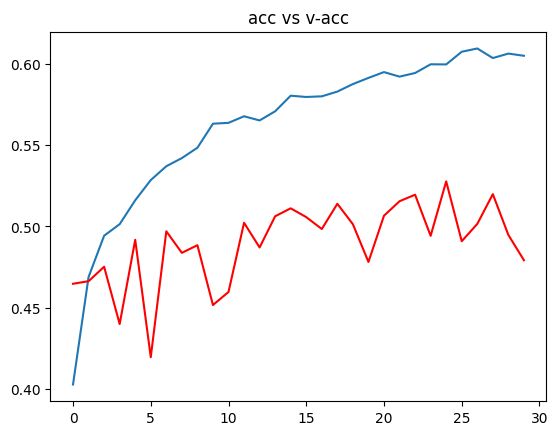

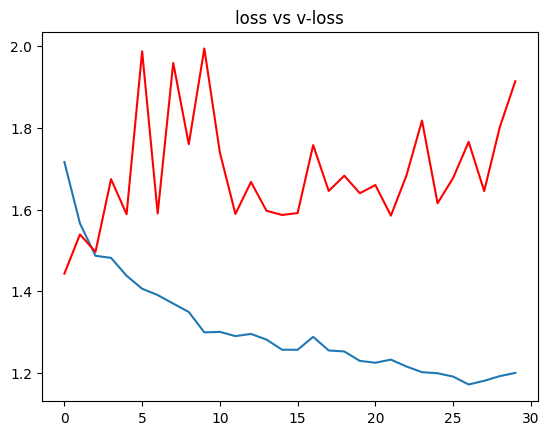

1/1 [==============================] - 1s 1s/step
The image is of angry


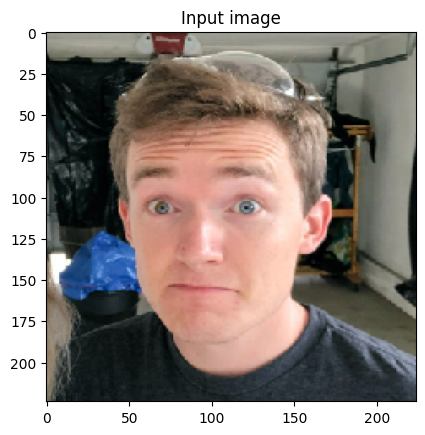

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from sklearn.model_selection import train_test_split

# Path to your FER2013 dataset
data_dir = "/content"

input_shape = (224, 224, 3)

# Use VGG16 as the base model
base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  # Prevent retraining

x = Flatten()(base_model.output)
x = Dense(units=7, activation='softmax')(x)
model = Model(base_model.input, x)
model.summary()

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Data augmentation for training set with reduced batch size
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

# List all filenames in the training directory
all_filenames = [os.path.join(data_dir, "train", class_name, img_name) for class_name in os.listdir(os.path.join(data_dir, "train")) for img_name in os.listdir(os.path.join(data_dir, "train", class_name))]

# Split the filenames into training and validation sets
train_filenames, val_filenames = train_test_split(all_filenames, test_size=0.2, random_state=42)

# Create DataFrames for training and validation
train_df = pd.DataFrame({"filename": train_filenames, "label": [os.path.basename(os.path.dirname(filename)) for filename in train_filenames]})
val_df = pd.DataFrame({"filename": val_filenames, "label": [os.path.basename(os.path.dirname(filename)) for filename in val_filenames]})

# Create DirectoryIterator objects for training and validation
train_data = train_datagen.flow_from_dataframe(dataframe=train_df, x_col="filename", y_col="label", target_size=input_shape[:2], batch_size=16, class_mode='categorical', shuffle=True)
val_data = train_datagen.flow_from_dataframe(dataframe=val_df, x_col="filename", y_col="label", target_size=input_shape[:2], batch_size=16, class_mode='categorical', shuffle=False)

# Rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(directory="/content/test", target_size=input_shape[:2], batch_size=32, class_mode='categorical')

# Model checkpoints and early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=7, verbose=1, mode='auto')
mc = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
call_back = [es, mc]

# Training the model with smaller batch size
hist = model.fit_generator(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=val_data, validation_steps=len(val_data), callbacks=call_back)

# Load the best model
model = load_model("best_model.h5")

# Plot training history
h = hist.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

# Making predictions on a sample image
op = dict(zip(train_data.class_indices.values(), train_data.class_indices.keys()))
path = '/content/Screenshot 2024-01-29 010226.png'
img = load_img(path, target_size=input_shape[:2])
i = img_to_array(img) / 255
input_arr = np.array([i])
pred = np.argmax(model.predict(input_arr))
print(f"The image is of {op[pred]}")
plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()
